<a href="https://colab.research.google.com/github/Bripereira/DATA-SCIENCE-III/blob/main/Taller_2_Ejercicio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

Capas a usar.

In [ ]:
#Dense(10, activation='softmax')
#Dense(256, activation='relu'),
#Dropout(0.2),
#Dropout(0.2),
#Dense(128, activation='relu'),
#Flatten(input_shape=(28, 28)),
#Dense(512, activation='relu'),


In [ ]:
# Explicación para los alumnos:
# Esta red neuronal recibe imágenes de 28x28 píxeles en escala de grises y las clasifica en 10 categorías de ropa.
# Utiliza capas densas (fully connected) con activación ReLU y una capa final con activación softmax para la clasificación.
# Además, emplea Dropout para reducir el sobreajuste.


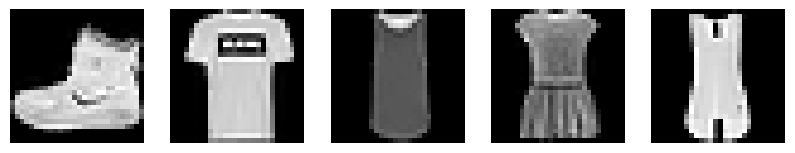

In [ ]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [ ]:
# Crear el modelo secuencial - El Dense tiene que ir disminuyendo de forma progresiva
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la imagen 28x28 a un vector
    Dense(512, activation='relu'), #Relu para quitar la linealidad
    Dropout(0.2), # apagado 20% de posibilidad
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 clases, activación softmax para clasificación
])

In [ ]:
# Compilar el modelo
## PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenar el modelo
##PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.
## Se utilizaron 10 para tener la máx precisión.


history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Imprimir la precisión en el conjunto de prueba
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7621 - loss: 0.6564 - val_accuracy: 0.8180 - val_loss: 0.4896
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8498 - loss: 0.4128 - val_accuracy: 0.8556 - val_loss: 0.4043
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8638 - loss: 0.3706 - val_accuracy: 0.8607 - val_loss: 0.3779
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8727 - loss: 0.3439 - val_accuracy: 0.8733 - val_loss: 0.3534
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8779 - loss: 0.3318 - val_accuracy: 0.8700 - val_loss: 0.3607
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8856 - loss: 0.3121 - val_accuracy: 0.8768 - val_loss: 0.3500
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8870 - loss: 0.3039 - val_accuracy: 0.8811 - val_loss: 0.3402
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8898 -

## PROBAR EL MODELO

In [ ]:
# categorias de la base de datos

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


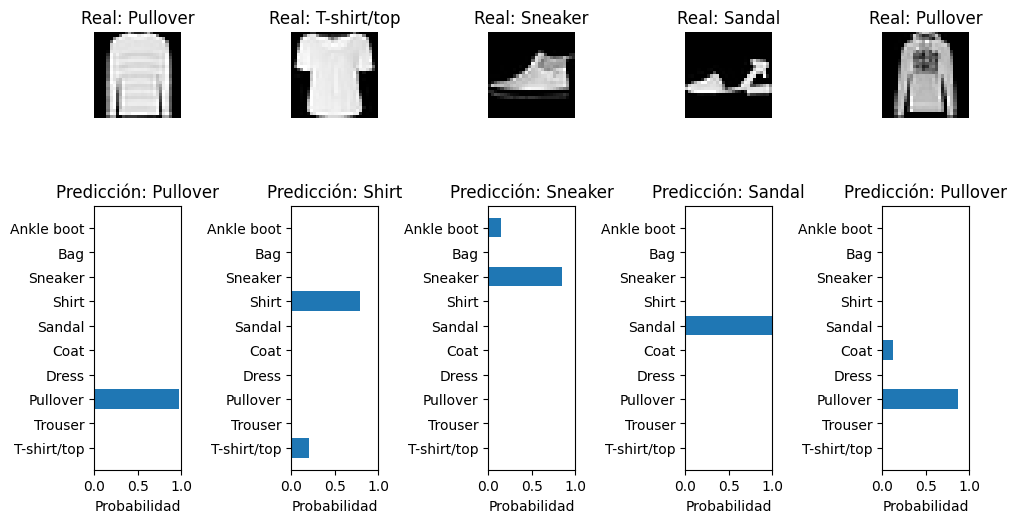

In [ ]:
import numpy as np

# Seleccionar 5 imágenes aleatorias del conjunto de prueba
num_images = 5
random_indices = np.random.choice(len(x_test), num_images, replace=False)  # Índices aleatorios
images = x_test[random_indices]
true_labels = y_test[random_indices]

# Hacer predicciones para las 5 imágenes
predictions = model.predict(images)


# Mostrar las imágenes con sus predicciones
plt.figure(figsize=(10, 6))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Real: {class_names[true_labels[i]]}")

    plt.subplot(2, num_images, i + 1 + num_images)
    plt.barh(class_names, predictions[i])
    plt.xlabel("Probabilidad")
    plt.xlim(0, 1)
    plt.title(f"Predicción: {class_names[np.argmax(predictions[i])]}")

plt.tight_layout()
plt.show()

# Conclusiones

El modelo de red neuronal desarrollado para clasificar imágenes de ropa del dataset Fashion-MNIST demostró una alta precisión, alcanzando aproximadamente un 90% en el conjunto de prueba.  Esto indica que el modelo ha aprendido exitosamente a distinguir entre las diez categorías de prendas de vestir.

La arquitectura de la red, que incluye capas de aplanamiento (Flatten), densas (Dense) con activación ReLU y Dropout para regularización, y una capa de salida con activación softmax, resultó efectiva para esta tarea. La optimización con el algoritmo Adam y la función de pérdida sparse_categorical_crossentropy fueron adecuadas para el problema de clasificación multiclase.

Las pruebas con cinco imágenes aleatorias del conjunto de prueba corroboran el buen desempeño del modelo.  Si bien la mayoría de las predicciones fueron correctas, se observaron algunas confusiones, como entre "Ankle Boot" y "Sneaker", y entre "Pullover" y "Coat".  Esto es comprensible, dado que estas categorías de prendas comparten características visuales similares.  Estas pequeñas confusiones no restan mérito a la efectividad general del modelo.

En resumen, el modelo presenta un rendimiento satisfactorio para la clasificación de imágenes de ropa en Fashion-MNIST. La arquitectura propuesta y los hiperparámetros seleccionados permitieron alcanzar una alta precisión, aunque siempre existe margen de mejora explorando diferentes arquitecturas o técnicas de aumento de datos.
